<a href="https://colab.research.google.com/github/ShineySun/Vision/blob/master/emotion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----
## ■ **Mount at your drive folder**
----


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/연구실/2021 소프트웨어 실제/"

 angry.jpeg		        happy.jpg
 emo_data.zip		        model.h5
 emotion_model.ipynb	        omar-lopez-1qfy-jDc_jo-unsplash.jpg
'Face Recognition Edit.ipynb'


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/연구실/2021 소프트웨어 실제/emo_data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


----
## ■ **Import library for emotion recognition & image processing**
----
### 1. **'Keras'** package
#### Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.
#### You can refer to the source code in this [keras code repository](https://github.com/keras-team)
----
### 2. **'Numpy'** package
#### NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
#### You can refer to the source code in this [numpy code repository](https://github.com/numpy/numpy)
----
### 3. **'Opencv'** package
#### Open Source Computer Vision Library
#### You can refer to the source code in this [opencv code repository](https://github.com/opencv/opencv)
----


In [ ]:
# import Numerical Calculation & image precessing library
import numpy as np
import cv2

# import deep learning library (keras)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

----
## ■ **Prepare the dataset to train the model**
----


In [ ]:
train_dir = 'train'
val_dir = 'test'

# Generate batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Takes the path to a directory & generates batches of augmented data.
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


----
## ■ **Define the model**
----
### 1. **Input Size : (48,48,1)**
#### Model takes the 48x48x1 image
```python
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
```
----
### 2. **Output Size : (7,1)**
#### Model's output is the 7x1 probabilities array for 7 classes
```python
emotion_model.add(Dense(7, activation='softmax'))
```
----

----
## ■ **Define the model**
----
### 1. **Input Size : (48,48,1)**
#### Model takes the 48x48x1 image
```python
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
```
----
### 2. **Output Size : (7,1)**
#### Model's output is the 7x1 probabilities array for 7 classes
#### Class : ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
```python
emotion_model.add(Dense(7, activation='softmax'))
```
----

In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

----
## ■ **Train the model**
----
#### It takes about 6 hours for training
----
### 1. **Loss : categorical_crossentropy**

### 2. **Optimizer : Adam**

### 3. **Epoch : 50**

### 4. **Batch Size : 64**
----

In [ ]:
# Training Session

# emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
# emotion_model_info = emotion_model.fit_generator(
#         train_generator,
#         steps_per_epoch=28709 // 64,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=7178 // 64)

In [ ]:
#Saving the model
#emotion_model.save('/content/drive/MyDrive/연구실/2021 소프트웨어 실제/model.h5')

----
## ■ **Load trained weights**
----

In [ ]:
from keras.models import load_model
emotion_model = load_model('/content/drive/MyDrive/연구실/2021 소프트웨어 실제/model.h5')

----
## ■ **Emotion Analysis(Visualization) Function**
----
### 1. Visaulize probabilies of each class using bar graph
----

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

----
## ■ **Crop the face Function using Haar CascadeClassifier class**
----

In [ ]:
import cv2
            
def facecrop(image):  
    #facedata = '/content/haarcascade_frontalface_alt.xml'
    # Load the Haar cascades
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Load the input image
    img = cv2.imread(image)
    # Convert RGB Image into GrayScale Image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    try:
        # Detect Faces in the image
        faces = cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4)

        #print(len(faces))
        
        # Crop the face area & Store it
        for idx, f in enumerate(faces):
            x, y, w, h = [ v for v in f ]
            #cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            sub_face = img[y:y+h, x:x+w]

            cv2.imwrite('capture_'+  str(idx) + '.jpg', sub_face)

    except Exception as e:
        print (e)

----
## ■ **Inference the Image**
----

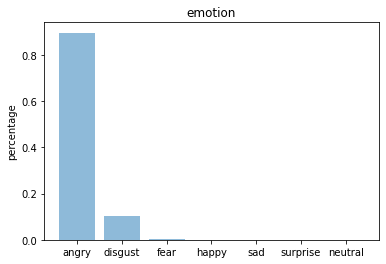

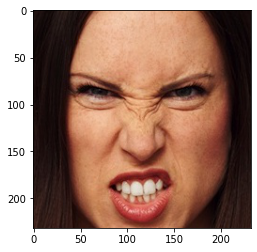

In [ ]:
# Crop the face image from image
facecrop('/content/drive/MyDrive/연구실/2021 소프트웨어 실제/angry.jpeg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

# Cropped image path
file = '/content/capture_0.jpg'

# Load the Cropped image
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

# predict the emotion using trained model(weights)
custom = emotion_model.predict(x)

# visualize the emotion
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

# visualize the cropped image
plt.imshow(true_image)
plt.show()

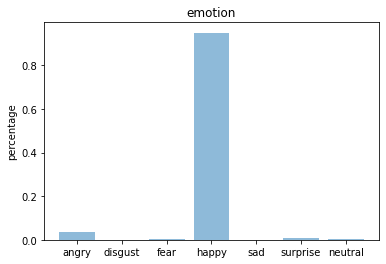

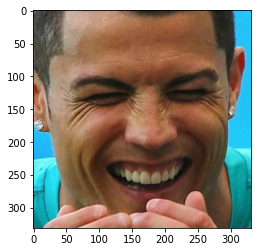

In [ ]:
# Crop the face image from image
facecrop('/content/drive/MyDrive/연구실/2021 소프트웨어 실제/happy.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

# Cropped image path
file = '/content/capture_0.jpg'

# Load the Cropped image
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

# predict the emotion using trained model(weights)
custom = emotion_model.predict(x)
# visualize the emotion
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

# visualize the cropped image
plt.imshow(true_image)
plt.show()